# Genetic Programming application

Dataset used: Breast Cancer Wisconsin (Original) Data Set (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

In [0]:
!pip install deap

In [0]:
import random
import operator
import csv
import itertools
import numpy
import pandas as pd 
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

**Import Dataset**

In [0]:
datasetCancer = pd.read_csv('./breast-cancer-wisconsin.csv', header=None)

In [0]:
datasetCancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Drop Sample Code Number(ID Number)**

In [0]:
datasetCancer = datasetCancer.drop(columns=0, axis=1)

**Splitting Data for Testing and Training**

In [0]:
train, test = train_test_split(datasetCancer, test_size=0.2)

In [0]:
train.shape

(559, 10)

In [0]:
print(train.head())

     1   2   3   4   5  6   7   8   9   10
83    3   1   1   1   2  2   7   1   1   2
539   6   1   1   1   2  1   2   1   1   2
16    4   1   1   1   2  1   2   1   1   2
94    2   1   1   1   2  1   3   1   1   2
455  10   2   2   1   2  6   1   1   2   4


In [0]:
test.shape

(140, 10)

In [0]:
print(test.head())

     1   2   3   4   5   6   7   8   9   10
645   3   1   1   1   2   1   2   1   1   2
676   1   1   2   1   2   1   2   1   1   2
446   1   1   1   1   2   1   1   1   1   2
632   1   1   1   1   2   1   1   1   1   2
252   6   3   3   5   3  10   3   5   3   2


In [0]:
train_data = train.values.tolist()

In [0]:
train_data[0] 

[3, 1, 1, 1, 2, '2', 7, 1, 1, 2]

In [0]:
len(train_data[0]) #columns - attributes 

10

In [0]:
len(train_data)#rows - entries

559

In [0]:
train_data_2 = list(list(float(elem) if elem != '?' else float(0) for elem in row) for row in train_data) # convert all values to float

In [0]:
train_data_2

[[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0, 2.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 2.0, 2.0, 1.0, 2.0, 6.0, 1.0, 1.0, 2.0, 4.0],
 [1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0],
 [6.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0],
 [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 2.0, 10.0, 4.0, 5.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [8.0, 9.0, 9.0, 5.0, 3.0, 5.0, 7.0, 7.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.

In [0]:
def convertClassValues(val):
    if val == 2:
        return True
    elif val == 4:
        return False

In [0]:
train[10] = train.apply(lambda row: convertClassValues(row[10]), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
test[10] = test.apply(lambda row: convertClassValues(row[10]), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_res = train[10]

In [0]:
test_res = test[10]

### Genetic Programming

In [0]:
# defined a new primitive set for strongly typed GP
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 9), bool, "IN")

In [0]:
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

In [0]:
# Define a safe division function for floating point operators
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

In [0]:
pset.addPrimitive(operator.add, [float,float], float)
pset.addPrimitive(operator.sub, [float,float], float)
pset.addPrimitive(operator.mul, [float,float], float)
pset.addPrimitive(protectedDiv, [float,float], float)

In [0]:
# Define new if-then-else function for logic operators
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

In [0]:
pset.addPrimitive(operator.lt, [float, float], bool)
pset.addPrimitive(operator.eq, [float, float], bool)
pset.addPrimitive(if_then_else, [bool, float, float], float)

In [0]:
# terminals
pset.addEphemeralConstant("rand9", lambda: random.random() * 100, float)
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

In [0]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [0]:
def evalTrainbase(individual):
    func = toolbox.compile(expr=individual)
    train_data_2_sample = random.sample(train_data_2, 200)
    result = sum(1 if (func(*val[:9]) == bool(val[9])) else 0 for val in train_data_2_sample)
    return result,

In [0]:
toolbox.register("evaluate", evalTrainbase)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [0]:
random.seed(10)
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)
    
algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 50, stats, halloffame=hof)

print(pop, stats, hof)

gen	nevals	avg  	std    	min	max
0  	100   	87.02	86.9692	0  	200
1  	54    	139.5	75.1067	0  	200
2  	41    	186.44	43.6933	0  	200
3  	61    	162.58	75.8108	0  	200
4  	58    	170.73	69.0969	0  	200
5  	62    	183.21	49.6009	0  	200
6  	49    	180.14	58.9308	0  	200
7  	54    	186.38	47.9808	0  	200
8  	77    	177.28	60.4192	0  	200
9  	65    	178.58	59.1108	0  	200
10 	61    	177.73	61.7443	0  	200
11 	51    	186.65	48.2459	0  	200
12 	56    	186.61	45.4447	0  	200
13 	71    	177.18	58.9319	0  	200
14 	64    	184.32	50.6187	0  	200
15 	58    	182.05	55.076 	0  	200
16 	52    	192.84	34.3915	0  	200
17 	51    	181.36	56.7205	0  	200
18 	59    	189.31	38.3825	0  	200
19 	72    	188.9 	42.1202	0  	200
20 	45    	184.13	49.1355	0  	200
21 	55    	180.08	56.7823	0  	200
22 	67    	183.83	51.2209	0  	200
23 	64    	187.94	45.9882	0  	200
24 	60    	190.88	39.793 	0  	200
25 	58    	188.29	40.8606	0  	200
26 	63    	186.28	43.6055	0  	200
27 	49    	190.31	40.2966	0  	200
28 	57    	183.82

In [0]:
hof

In [0]:
pop[0]

**Testing**

In [0]:
test_data = test.values.tolist()

In [0]:
test_data_2 = list(list(float(elem) if elem != '?' else float(0) for elem in row) for row in test_data)

In [0]:
def evalTest(individual):
    func = toolbox.compile(expr=individual)
    result = sum(1 if (func(*val[:9]) == bool(val[9])) else 0 for val in test_data_2)
    return result

#### Running evaluation for the population on the test dataset

In [0]:
for ind in pop:
    print(evalTest(ind))

93
93
93
93
114
93
93
93
93
93
93
47
93
93
93
93
93
93
93
93
93
47
93
93
93
47
93
93
93
93
93
93
93
93
93
93
93
93
93
11
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93
93


In [0]:
toolbox.compile(expr=pop[0])

<function <lambda>>

In [0]:
def predict(individual):
    func = toolbox.compile(expr=individual)
    result = list(func(*val[:9]) for val in test_data_2)
    return result

In [0]:
accuracy_score(test_res, predict(pop[0]))

0.6642857142857143

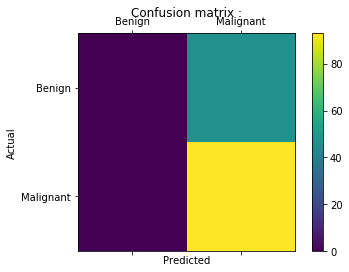

In [0]:
confusion_matrix_val = confusion_matrix(test_res, predict(pop[0]))
labels = ['Benign', 'Malignant']

# Create the plot figure 
fig = plt.figure()

# Comfusion Matrix subplot
subplt = fig.add_subplot(111)
csubplt = subplt.matshow(confusion_matrix_val)

plt.title('Confusion matrix :')
fig.colorbar(csubplt)

subplt.set_xticklabels([''] + labels)
subplt.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
nodes, edges, labels = gp.graph(pop[0])

In [0]:
!apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bion

In [0]:
!pip install pygraphviz

    100% |████████████████████████████████| 122kB 3.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b
Successfully built pygraphviz


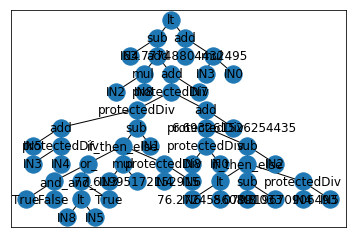

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

References: 
1. https://deap.readthedocs.io/en/master/examples/gp_spambase.html
2. https://deap.readthedocs.io/en/0.9.2/api/gp.html
